# Introduction

This dataset consists of credit card transactions that occured in Europe on September 2013. 

Dataset link: https://datahub.io/machine-learning/creditcard

Our goal is to take all the features V1,V2,V3 and so on in the dataset and predict whether the transaction is Fraud or Not (Binary Classification problem)

# Setup

In this step we will import all the necessary packages required for this task

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_auc_score

from datetime import datetime 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC

# Load the data

In [2]:
dataframe = pd.read_csv("./data/creditcard.csv") 
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dataframe.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Data Preprocessing

In [4]:
# check for NAN values in dataset
dataframe.isnull().values.any()

False

This means there are no NULL or NAN values in the dataset

Now lets check the class labels that we need to predict and its distribution in trainset

In [5]:
fraud_transactions = dataframe[dataframe['Class'] == 1] 
valid_transactions = dataframe[dataframe['Class'] == 0] 
print("FRAUD TRANSACTIONS = " + str(len(fraud_transactions)))
print("VALID TRANSACTIONS = " + str(len(valid_transactions)))
print("% of Fraud Transactions = " + str((len(fraud_transactions)/(len(fraud_transactions)+len(valid_transactions)))*100))

FRAUD TRANSACTIONS = 492
VALID TRANSACTIONS = 284315
% of Fraud Transactions = 0.1727485630620034


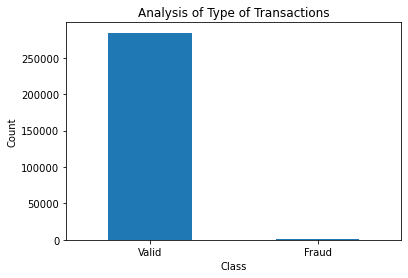

<Figure size 432x288 with 0 Axes>

In [6]:
labels = ["Valid", "Fraud"]
count_classes = dataframe.value_counts(dataframe['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Analysis of Type of Transactions")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()
plt.savefig(f"./images/CreditFraudClasses.png")

From our dataset, we can see majority of transactions are valid. Fraud transactions contribute to only 0.17% of entire data which makes our dataset highly imbalanced

Also we can see V1 to V28 are independent features and we can assume they are not correlated with Class we want to predict. 

Lets check if the columns "Time" and "Amount" can be used in predictions

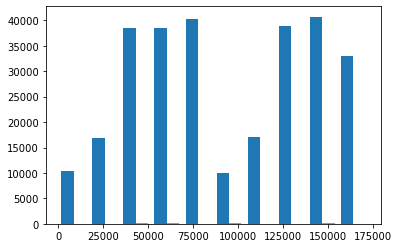

<Figure size 432x288 with 0 Axes>

In [7]:
# visualizing the correlation between time and class
class_0 = dataframe.loc[dataframe['Class'] == 0]["Time"]
class_1 = dataframe.loc[dataframe['Class'] == 1]["Time"]
hist_data = [class_0, class_1]
group_labels = ['Valid', 'Fraud']
plt.hist(np.array(hist_data,dtype=object), bins=10)
plt.show()
plt.savefig(f"./images/CreditFraud_TimeVsClass.png")

We now understood that time and class are not correlated. Lets explore Amount

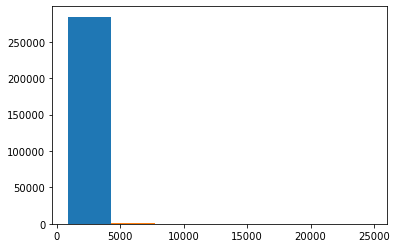

<Figure size 432x288 with 0 Axes>

In [8]:
class_0 = dataframe.loc[dataframe['Class'] == 0]['Amount']
class_1 = dataframe.loc[dataframe['Class'] == 1]['Amount']
hist_data = [class_0, class_1]
group_labels = ['Valid', 'Fraud']
plt.hist(np.array(hist_data,dtype=object), bins=3)
plt.show()
plt.savefig(f"./images/CreditFraud_AmountVsClass.png")

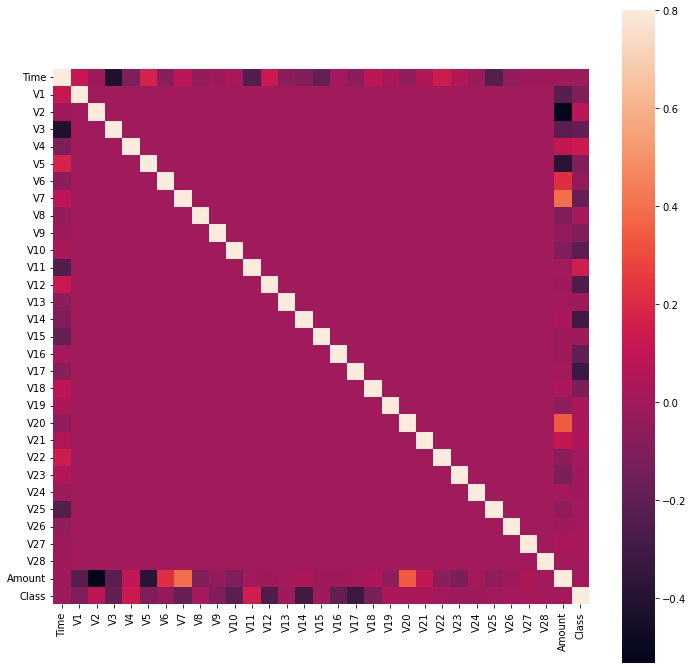

<Figure size 432x288 with 0 Axes>

In [9]:
# plotting the correlation matrix
corrmatrix = dataframe.corr() 
fig = plt.figure(figsize = (12, 12)) 
sns.heatmap(corrmatrix, vmax = .8, square = True) 
plt.show() 
plt.savefig(f"./images/CreditFraud_CorrelationMatrix.png")

In [10]:
# Applying scaling on Amount column
scaler = StandardScaler()
dataframe["NormalizedAmount"] = scaler.fit_transform(dataframe["Amount"].values.reshape(-1, 1))
dataframe.drop(["Amount"], inplace= True, axis= 1)
Y = dataframe["Class"]
X = dataframe.drop(["Class"], axis= 1)

Now split the data into train, test and validation sets

In [11]:
train_df, test_df = train_test_split(dataframe, test_size=0.2, random_state=42, shuffle=True)
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=42, shuffle=True)
print("Length of train_set is: {X_train}".format(X_train = len(train_df)))
print("Length of test_set is: {X_test}".format(X_test = len(test_df)))
print("Length of validation_set is: {y_train}".format(y_train = len(valid_df)))

Length of train_set is: 182276
Length of test_set is: 56962
Length of validation_set is: 45569


In [12]:
X_train = train_df.drop("Class", axis=1)
Y_train = train_df["Class"]
X_test = test_df.drop("Class", axis=1)
Y_test = test_df["Class"]
X_valid = valid_df.drop("Class", axis=1)
Y_valid = valid_df["Class"]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, X_valid.shape, Y_valid.shape,

((182276, 30), (182276,), (56962, 30), (56962,), (45569, 30), (45569,))

# Machine Learning

In [13]:
def evaluation_metrics(y_test, y_pred, model):
    n_errors = (y_pred != y_test).sum() 
    print("The model used is " + str(model)) 
    acc = accuracy_score(y_test, y_pred) 
    print("The accuracy is {}".format(acc)) 
    prec = precision_score(y_test, y_pred) 
    print("The precision is {}".format(prec)) 
    rec = recall_score(y_test, y_pred) 
    print("The recall is {}".format(rec)) 
    f1 = f1_score(y_test, y_pred) 
    print("The F1-Score is {}".format(f1)) 
    MCC = matthews_corrcoef(y_test, y_pred) 
    print("The Matthews correlation coefficient is {}".format(MCC)) 
    AUC = roc_auc_score(y_test, y_pred)
    print("The ROC-AUC Score is {}".format(AUC)) 

In [14]:
def plot_confusion_matrix(y_test, y_pred, model):
    class_labels = ['NotFraud', 'Fraud'] 
    conf_matrix = confusion_matrix(y_test, y_pred) 
    plt.figure(figsize =(5, 5)) 
    sns.heatmap(conf_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, fmt ="d"); 
    plt.title("Confusion matrix of " + str(model)) 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show() 
    plt.savefig(f"./images/CreditFraud_"+str(model)+".png")

The model used is DecisionTreeClassifier
The accuracy is 0.9991046662687406
The precision is 0.7373737373737373
The recall is 0.7448979591836735
The F1-Score is 0.7411167512690355
The Matthews correlation coefficient is 0.7406778962759477
The ROC-AUC Score is 0.8722203639474924


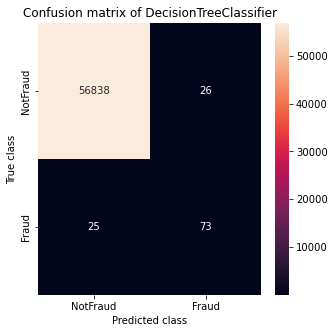

<Figure size 432x288 with 0 Axes>

In [15]:
# Decision Trees Classifier
 
dtc = DecisionTreeClassifier() 
dtc.fit(X_train, Y_train) 
dtc_Y_pred = dtc.predict(X_test) 

evaluation_metrics(Y_test,dtc_Y_pred, "DecisionTreeClassifier")
plot_confusion_matrix(Y_test,dtc_Y_pred, "DecisionTreeClassifier")

The model used is RandomForestClassifier
The accuracy is 0.9995611109160493
The precision is 0.974025974025974
The recall is 0.7653061224489796
The F1-Score is 0.8571428571428571
The Matthews correlation coefficient is 0.8631826952924256
The ROC-AUC Score is 0.8826354754056941


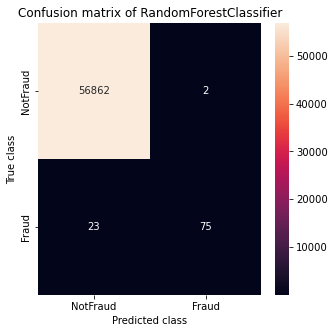

<Figure size 432x288 with 0 Axes>

In [16]:
# Random Forest Classifier
 
rfc = RandomForestClassifier() 
rfc.fit(X_train, Y_train) 
rfc_Y_pred = rfc.predict(X_test) 

evaluation_metrics(Y_test,rfc_Y_pred, "RandomForestClassifier")
plot_confusion_matrix(Y_test,rfc_Y_pred, "RandomForestClassifier")

The model used is KNearestNeighborClassification
The accuracy is 0.9984551104244935
The precision is 1.0
The recall is 0.10204081632653061
The F1-Score is 0.1851851851851852
The Matthews correlation coefficient is 0.31919139533099466
The ROC-AUC Score is 0.5510204081632653


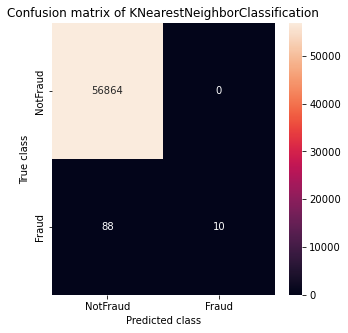

<Figure size 432x288 with 0 Axes>

In [17]:
# K-Nearest Neighbours
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
knn_Y_pred = knn.predict(X_test) 

evaluation_metrics(Y_test,knn_Y_pred, "KNearestNeighborClassification")
plot_confusion_matrix(Y_test,knn_Y_pred, "KNearestNeighborClassification")

The model used is SupportVectorClassificationWithLinearKernel
The accuracy is 0.9984375548611355
The precision is 0.5918367346938775
The recall is 0.29591836734693877
The F1-Score is 0.3945578231292517
The Matthews correlation coefficient is 0.4178143887527753
The ROC-AUC Score is 0.6477833254855122


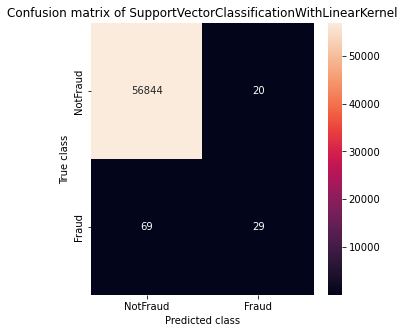

The model used is SupportVectorClassificationWithRbfKernel
The accuracy is 0.9982795547909132
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
The Matthews correlation coefficient is 0.0
The ROC-AUC Score is 0.5


/Users/sravya/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



<Figure size 432x288 with 0 Axes>

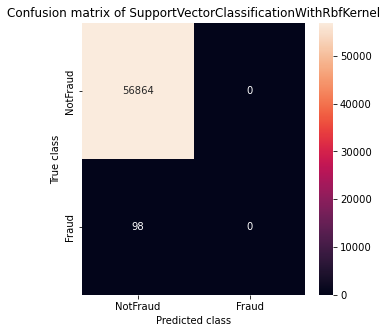

The model used is SupportVectorClassificationWithPolyKernel
The accuracy is 0.9982795547909132
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
The Matthews correlation coefficient is 0.0
The ROC-AUC Score is 0.5


/Users/sravya/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



<Figure size 432x288 with 0 Axes>

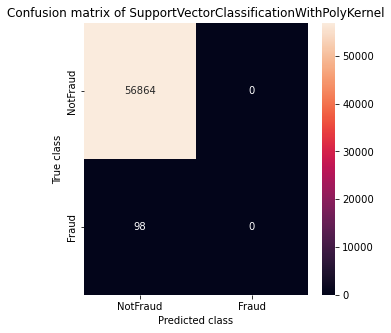

The model used is SupportVectorClassificationWithSigmoidKernel
The accuracy is 0.9982795547909132
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
The Matthews correlation coefficient is 0.0
The ROC-AUC Score is 0.5


/Users/sravya/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



<Figure size 432x288 with 0 Axes>

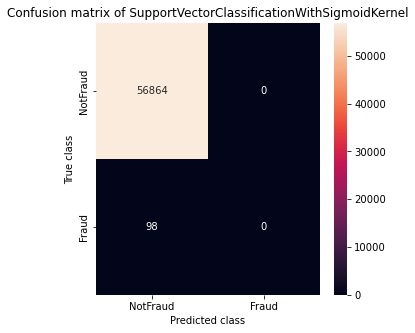

<Figure size 432x288 with 0 Axes>

In [19]:
# Support Vector Machines

svc1 = SVC(random_state=42, kernel='linear')
svc1.fit(X_train, Y_train)
svc1_Y_pred = svc1.predict(X_test)
evaluation_metrics(Y_test,svc1_Y_pred, "SupportVectorClassificationWithLinearKernel")
plot_confusion_matrix(Y_test,svc1_Y_pred, "SupportVectorClassificationWithLinearKernel")

svc2 = SVC(random_state=42, kernel='rbf')
svc2.fit(X_train, Y_train)
svc2_Y_pred = svc2.predict(X_test)
evaluation_metrics(Y_test,svc2_Y_pred, "SupportVectorClassificationWithRbfKernel")
plot_confusion_matrix(Y_test,svc2_Y_pred, "SupportVectorClassificationWithRbfKernel")

svc3 = SVC(random_state=42, kernel='poly')
svc3.fit(X_train, Y_train)
svc3_Y_pred = svc3.predict(X_test)
evaluation_metrics(Y_test,svc3_Y_pred, "SupportVectorClassificationWithPolyKernel")
plot_confusion_matrix(Y_test,svc3_Y_pred, "SupportVectorClassificationWithPolyKernel")

svc4 = SVC(random_state=42, kernel='sigmoid')
svc4.fit(X_train, Y_train)
svc4_Y_pred = svc4.predict(X_test)
evaluation_metrics(Y_test,svc4_Y_pred, "SupportVectorClassificationWithSigmoidKernel")
plot_confusion_matrix(Y_test,svc4_Y_pred, "SupportVectorClassificationWithSigmoidKernel")

The model used is AdaBoostClassification
The accuracy is 0.9993153330290369
The precision is 0.8554216867469879
The recall is 0.7244897959183674
The F1-Score is 0.7845303867403315
The Matthews correlation coefficient is 0.7869053021234045
The ROC-AUC Score is 0.8621393830464094


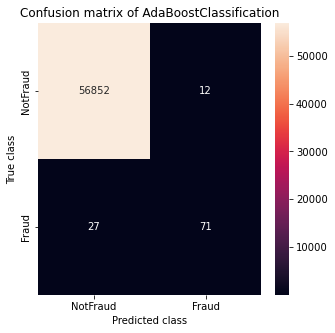

<Figure size 432x288 with 0 Axes>

In [20]:
# Boosting
adc = AdaBoostClassifier(random_state=42,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                         n_estimators=100)
adc.fit(X_train, Y_train)
adc_Y_pred = adc.predict(X_test) 

evaluation_metrics(Y_test,adc_Y_pred, "AdaBoostClassification")
plot_confusion_matrix(Y_test,adc_Y_pred, "AdaBoostClassification")

The model used is SingleLayerPerceptronClassification
The accuracy is 0.9982795547909132
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
The Matthews correlation coefficient is 0.0
The ROC-AUC Score is 0.5


/Users/sravya/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



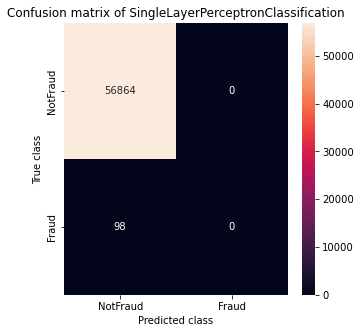

<Figure size 432x288 with 0 Axes>

In [21]:
# Single Layer Neural Network
slp = Perceptron(max_iter=300)
slp.fit(X_train, Y_train)

slp.fit(X_train, Y_train)
slp_Y_pred = slp.predict(X_test) 

evaluation_metrics(Y_test,slp_Y_pred,"SingleLayerPerceptronClassification")
plot_confusion_matrix(Y_test,slp_Y_pred,"SingleLayerPerceptronClassification")

The model used is MultiLayerPerceptronClassification
The accuracy is 0.9982795547909132
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
The Matthews correlation coefficient is 0.0
The ROC-AUC Score is 0.5


/Users/sravya/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



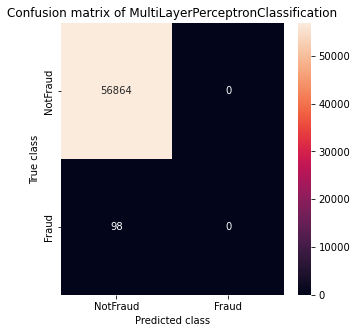

<Figure size 432x288 with 0 Axes>

In [22]:
# Multi Layer Neural Networks
mlpc = MLPClassifier(hidden_layer_sizes=(150,100,50), 
                     max_iter=300,
                     activation = 'relu',
                     solver='adam',
                     random_state=1)
mlpc.fit(X_train, Y_train)
mlpc_Y_pred = mlpc.predict(X_test) 

evaluation_metrics(Y_test,mlpc_Y_pred,"MultiLayerPerceptronClassification")
plot_confusion_matrix(Y_test,mlpc_Y_pred,"MultiLayerPerceptronClassification")

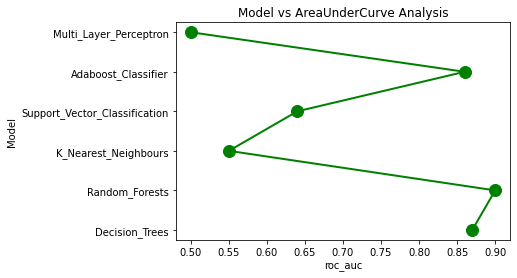

<Figure size 432x288 with 0 Axes>

In [23]:
# Comparison of area under curve metric for various models
model = ["Decision_Trees", "Random_Forests", "K_Nearest_Neighbours", "Support_Vector_Classification", 
         "Adaboost_Classifier", "Multi_Layer_Perceptron"]
auc_results = [0.87,0.90,0.55,0.64,0.86,0.5]
plt.plot(auc_results,model,color='green', marker='o',linewidth=2, markersize=12)
plt.title("Model vs AreaUnderCurve Analysis")
plt.ylabel("Model")
plt.xlabel("roc_auc")
plt.show()
plt.savefig(f"./images/CreditFraud_Models_AUC.png")

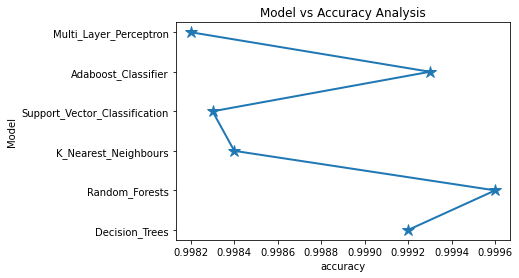

<Figure size 432x288 with 0 Axes>

In [24]:
# Comparison of accuracy metric for various models
model = ["Decision_Trees", "Random_Forests", "K_Nearest_Neighbours", "Support_Vector_Classification", 
         "Adaboost_Classifier", "Multi_Layer_Perceptron"]
acc_results = [0.9992,0.9996,0.9984,0.9983,0.9993,0.9982]
plt.plot(acc_results,model, marker='*',linewidth=2, markersize=12)
plt.title("Model vs Accuracy Analysis")
plt.ylabel("Model")
plt.xlabel("accuracy")
plt.show()
plt.savefig(f"./images/CreditFraud_Models_Accuracy.png")

From this analysis, we can infer RandomForest classifier worked well compared to the other models used in Predicting Credit card Fraud transactions

Lets generate csv file with RandomForest classifier predictions for the given problem set

In [25]:
submission = pd.DataFrame({
        "Id": np.arange(0, len(X_test)) + 1,
        "Class": rfc_Y_pred
    })
submission.to_csv('submission_creditfraud.csv', index=False)